# Predict Blood Donation for Future Expectancy
    


In [2]:
#imports
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

>Inspecting transfusion DataFrame


In [3]:
#Reading Data 
Transfusion = pd.read_csv("Data//transfusion.data")
Transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
Transfusion.shape

(748, 5)

In [5]:
Transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
Transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# Creating target column

In [7]:
#changing name to target column
Transfusion.rename(columns = {'whether he/she donated blood in March 2007': 'Target'} ,inplace= True)
Transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


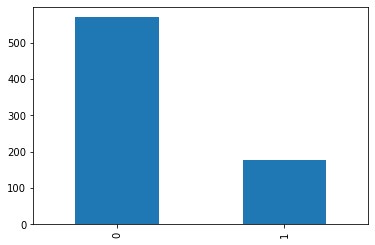

In [8]:
#visualizing Target coulm value counts
Transfusion["Target"].value_counts().plot(kind='bar')
plt.show()

In [9]:
X = Transfusion.drop("Target", axis= 'columns')
y = Transfusion['Target']
from sklearn.model_selection import train_test_split 
X_train , X_test  , y_train ,y_test = train_test_split(X ,y ,test_size= 0.25 ,random_state= 42 , stratify= y )

In [10]:
y_train.value_counts()

0    427
1    134
Name: Target, dtype: int64

In [11]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score
tpot = TPOTClassifier(generations=5, population_size=20, 
                                    random_state=42, verbosity=2,scoring= 'roc_auc')
tpot.fit(X_train,y_train)

C:\Users\Anas\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7487957019420768

Generation 2 - Current best internal CV score: 0.7487957019420768

Generation 3 - Current best internal CV score: 0.7487957019420768

Generation 4 - Current best internal CV score: 0.7487957019420768

Generation 5 - Current best internal CV score: 0.7487957019420768

Best pipeline: MLPClassifier(RobustScaler(input_matrix), alpha=0.0001, learning_rate_init=0.01)


TPOTClassifier(generations=5, population_size=20, random_state=42,
               scoring='roc_auc', verbosity=2)

In [12]:
print(tpot.score(X_test, y_test))

0.7671646535282899


C:\Users\Anas\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [13]:
np.round (X_train.var(),decimals= 3)

Recency (months)              66.929
Frequency (times)             33.830
Monetary (c.c. blood)    2114363.700
Time (months)                611.147
dtype: float64

In [29]:
#log normlaztion
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()


col_to_norm = 'Monetary (c.c. blood)'

# Log normalization
for newdf in [X_train_normed, X_test_normed]:
    newdf['monetary_log'] = np.log(newdf[col_to_norm])
    newdf.drop(columns=col_to_norm, inplace=True)

# Check the variance
X_train_normed.var().round(3)

Recency (months)      66.929
Frequency (times)     33.830
Time (months)        611.147
monetary_log           0.837
dtype: float64

In [ ]:
#traning linear regerssion 